In [40]:
# Copyright 2024, Nikolaos Panagiotou, npan1990@gmail.com
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import json

import pandas as pd

In [3]:
# load train and dev set
TRAIN_FILE = '../data/squad/train-v2.0.json'
DEV_FILE = '../data/squad/dev-v2.0.json'

trainset_d = json.load(open(TRAIN_FILE))
devset_d = json.load(open(DEV_FILE))

In [4]:
# inspect a single data point
trainset_d['data'][0]

{'title': 'Beyoncé',
 'paragraphs': [{'qas': [{'question': 'When did Beyonce start becoming popular?',
     'id': '56be85543aeaaa14008c9063',
     'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
     'is_impossible': False},
    {'question': 'What areas did Beyonce compete in when she was growing up?',
     'id': '56be85543aeaaa14008c9065',
     'answers': [{'text': 'singing and dancing', 'answer_start': 207}],
     'is_impossible': False},
    {'question': "When did Beyonce leave Destiny's Child and become a solo singer?",
     'id': '56be85543aeaaa14008c9066',
     'answers': [{'text': '2003', 'answer_start': 526}],
     'is_impossible': False},
    {'question': 'In what city and state did Beyonce  grow up? ',
     'id': '56bf6b0f3aeaaa14008c9601',
     'answers': [{'text': 'Houston, Texas', 'answer_start': 166}],
     'is_impossible': False},
    {'question': 'In which decade did Beyonce become famous?',
     'id': '56bf6b0f3aeaaa14008c9602',
     'answers': [{'text

In [5]:
# inspect a paragraph
trainset_d['data'][0]['paragraphs']

[{'qas': [{'question': 'When did Beyonce start becoming popular?',
    'id': '56be85543aeaaa14008c9063',
    'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
    'is_impossible': False},
   {'question': 'What areas did Beyonce compete in when she was growing up?',
    'id': '56be85543aeaaa14008c9065',
    'answers': [{'text': 'singing and dancing', 'answer_start': 207}],
    'is_impossible': False},
   {'question': "When did Beyonce leave Destiny's Child and become a solo singer?",
    'id': '56be85543aeaaa14008c9066',
    'answers': [{'text': '2003', 'answer_start': 526}],
    'is_impossible': False},
   {'question': 'In what city and state did Beyonce  grow up? ',
    'id': '56bf6b0f3aeaaa14008c9601',
    'answers': [{'text': 'Houston, Texas', 'answer_start': 166}],
    'is_impossible': False},
   {'question': 'In which decade did Beyonce become famous?',
    'id': '56bf6b0f3aeaaa14008c9602',
    'answers': [{'text': 'late 1990s', 'answer_start': 276}],
    'is_imposs

In [6]:
# The dataset version
trainset_d['version']

'v2.0'

In [7]:
# parse data as a data frame
trainset_df = pd.DataFrame(trainset_d['data'])

In [8]:
trainset_df['paragraphs_number'] = trainset_df['paragraphs'].str.len()
trainset_df['doc_id'] = range(1,trainset_df.shape[0]+1)

In [9]:
# create a dataset where each row is a paragraph
paragraphs_trainset_df = trainset_df.explode(['paragraphs'])

In [10]:
paragraphs_trainset_df['paragraph_id'] = range(1,paragraphs_trainset_df.shape[0]+1)

In [11]:
paragraphs_trainset_df['qa'] = paragraphs_trainset_df.apply(lambda x: x['paragraphs']['qas'], axis=1)

In [12]:
paragraphs_trainset_df['context'] = paragraphs_trainset_df.apply(lambda x: x['paragraphs']['context'], axis=1)

In [13]:
paragraphs_trainset_df['number_qa'] = paragraphs_trainset_df['qa'].str.len()

In [14]:
paragraphs_trainset_df

,title,paragraphs,paragraphs_number,doc_id,paragraph_id,qa,context,number_qa
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,[{'question': 'When did Beyonce start becoming...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15
0,Beyoncé,{'qas': [{'question': 'After her second solo a...,66,1,2,"[{'question': 'After her second solo album, wh...",Following the disbandment of Destiny's Child i...,12
0,Beyoncé,"{'qas': [{'question': 'In her music, what are ...",66,1,3,"[{'question': 'In her music, what are some rec...","A self-described ""modern-day feminist"", Beyonc...",12
0,Beyoncé,{'qas': [{'question': 'Beyonce's younger sibli...,66,1,4,[{'question': 'Beyonce's younger sibling also ...,"Beyoncé Giselle Knowles was born in Houston, T...",13
0,Beyoncé,{'qas': [{'question': 'What town did Beyonce g...,66,1,5,[{'question': 'What town did Beyonce go to sch...,Beyoncé attended St. Mary's Elementary School ...,11
...,...,...,...,...,...,...,...,...
441,Matter,{'qas': [{'plausible_answers': [{'text': '1643...,29,442,19031,"[{'plausible_answers': [{'text': '1643', 'answ...",Isaac Newton (1643–1727) inherited Descartes' ...,5
441,Matter,{'qas': [{'plausible_answers': [{'text': 'the ...,29,442,19032,[{'plausible_answers': [{'text': 'the early 20...,"There is an entire literature concerning the ""...",5
441,Matter,{'qas': [{'plausible_answers': [{'text': 'part...,29,442,19033,"[{'plausible_answers': [{'text': 'particle', '...",In the late 19th century with the discovery of...,5
441,Matter,{'qas': [{'plausible_answers': [{'text': 'four...,29,442,19034,"[{'plausible_answers': [{'text': 'four', 'answ...",These quarks and leptons interact through four...,5


In [15]:
# create a dataset where each row is a question
q_trainset_df = paragraphs_trainset_df.explode(['qa'])

In [16]:
q_trainset_df['question'] = q_trainset_df.apply(lambda x: x['qa']['question'], axis=1)
q_trainset_df['answers'] = q_trainset_df.apply(lambda x: x['qa']['answers'], axis=1)

In [17]:
q_trainset_df['answers_number'] = q_trainset_df['answers'].str.len()

In [18]:
# are there questions with more than a single answer?
q_trainset_df[q_trainset_df['answers_number']>1]

,title,paragraphs,paragraphs_number,doc_id,paragraph_id,qa,context,number_qa,question,answers,answers_number


In [19]:
# create a dataset where each row is a qa
qa_trainset_df = q_trainset_df.explode(['answers'])

In [20]:
negative_qa_trainset_df = qa_trainset_df[qa_trainset_df['answers'].isnull()]
positive_qa_trainset_df = qa_trainset_df[~qa_trainset_df['answers'].isnull()].copy()

In [21]:
positive_qa_trainset_df['answer'] = positive_qa_trainset_df.apply(lambda x: x['answers']['text'], axis=1)

In [22]:
positive_qa_trainset_df

,title,paragraphs,paragraphs_number,doc_id,paragraph_id,qa,context,number_qa,question,answers,answers_number,answer
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,{'question': 'When did Beyonce start becoming ...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15,When did Beyonce start becoming popular?,"{'text': 'in the late 1990s', 'answer_start': ...",1,in the late 1990s
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,{'question': 'What areas did Beyonce compete i...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15,What areas did Beyonce compete in when she was...,"{'text': 'singing and dancing', 'answer_start'...",1,singing and dancing
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,{'question': 'When did Beyonce leave Destiny's...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15,When did Beyonce leave Destiny's Child and bec...,"{'text': '2003', 'answer_start': 526}",1,2003
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,{'question': 'In what city and state did Beyon...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15,In what city and state did Beyonce grow up?,"{'text': 'Houston, Texas', 'answer_start': 166}",1,"Houston, Texas"
0,Beyoncé,{'qas': [{'question': 'When did Beyonce start ...,66,1,1,{'question': 'In which decade did Beyonce beco...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,15,In which decade did Beyonce become famous?,"{'text': 'late 1990s', 'answer_start': 276}",1,late 1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
439,Kathmandu,{'qas': [{'question': 'In what US state did Ka...,58,440,18980,{'question': 'In what US state did Kathmandu f...,"Kathmandu Metropolitan City (KMC), in order to...",5,In what US state did Kathmandu first establish...,"{'text': 'Oregon', 'answer_start': 229}",1,Oregon
439,Kathmandu,{'qas': [{'question': 'In what US state did Ka...,58,440,18980,{'question': 'What was Yangon previously known...,"Kathmandu Metropolitan City (KMC), in order to...",5,What was Yangon previously known as?,"{'text': 'Rangoon', 'answer_start': 414}",1,Rangoon
439,Kathmandu,{'qas': [{'question': 'In what US state did Ka...,58,440,18980,{'question': 'With what Belorussian city does ...,"Kathmandu Metropolitan City (KMC), in order to...",5,With what Belorussian city does Kathmandu have...,"{'text': 'Minsk', 'answer_start': 476}",1,Minsk
439,Kathmandu,{'qas': [{'question': 'In what US state did Ka...,58,440,18980,{'question': 'In what year did Kathmandu creat...,"Kathmandu Metropolitan City (KMC), in order to...",5,In what year did Kathmandu create its initial ...,"{'text': '1975', 'answer_start': 199}",1,1975


# Meet the Data

Lets identify some statistics in the data:

1. Number of paragraphs over documents
2. Number of questions over paragraphs
3. Average question length
4. Averae question tokens
5. Average answer tokens

In [31]:
import seaborn as sns

Text(0.5, 0, 'Only context characters')

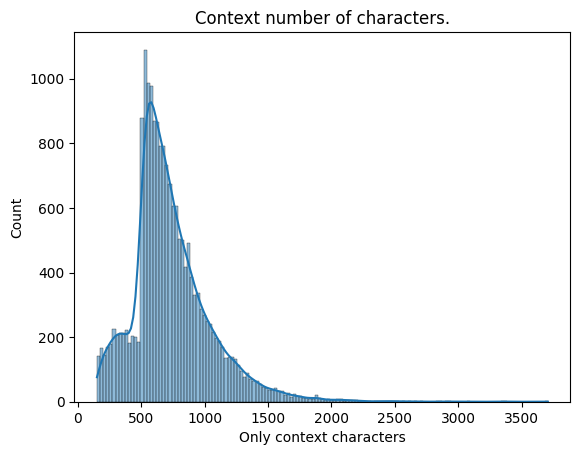

In [32]:
paragraphs_trainset_df['only_context_chars'] = paragraphs_trainset_df['context'].str.len()
ax = sns.histplot(data=paragraphs_trainset_df, x="only_context_chars",kde=True)
ax.set_title('Context number of characters.')
ax.set_xlabel('Only context characters')

# Carefull 

The average context is 700 only characters long. 
However, the maximum context is 3.8K characters and this is dangerous for early models such as BERT.
Lets remember this dirrent the implementation.
It is very important for the custom solution such as BiDAF.
For BERT we will need to enable truncation.

## Paragraphs

In this section lets focus on paragraphs:

1. Lets examine whats inside the paragraphs
2. Lets clean the paragraphs
3. Lets tokenize the content

Text(0.5, 0, 'Paragraphs number')

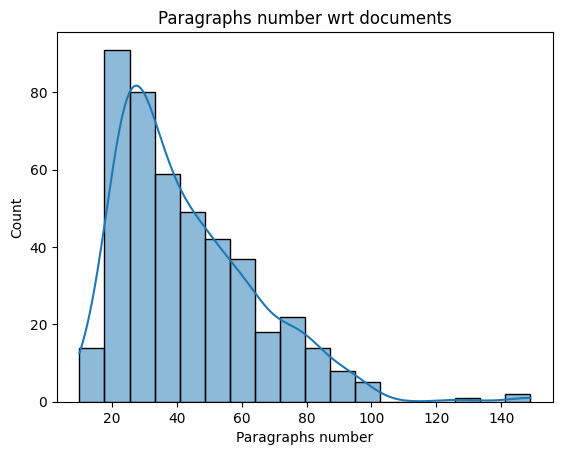

In [36]:
ax = sns.histplot(data=trainset_df, x="paragraphs_number",kde=True)
ax.set_title('Paragraphs number wrt documents')
ax.set_xlabel('Paragraphs number')

Text(0.5, 0, 'Questions number')

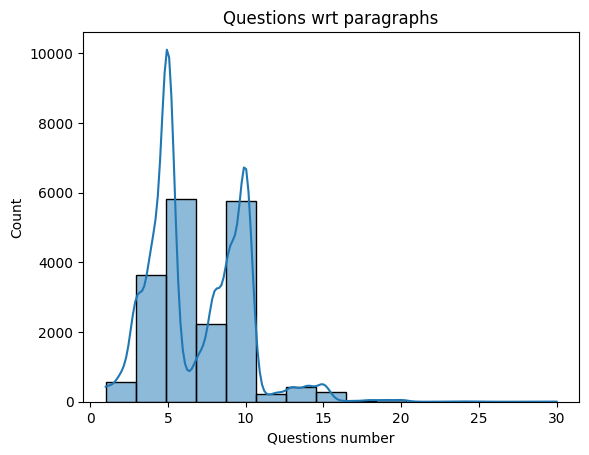

In [38]:
ax = sns.histplot(data=paragraphs_trainset_df, x="number_qa", bins=15,kde=True)
ax.set_title('Questions wrt paragraphs')
ax.set_xlabel('Questions number')

In [33]:
paragraphs_trainset_df['number_qa'].describe()

count    19035.000000
mean         6.846283
std          3.090609
min          1.000000
25%          5.000000
50%          5.000000
75%          9.000000
max         30.000000
Name: number_qa, dtype: float64

In [46]:
import re

import nltk
nltk.download('stopwords')

def normalize_text(text: str):
    text = text.lower()

    # replace every whitespace with single space
    text = re.sub(r'[\s+]',' ', text)

    # remove weird characters but keep stops and commas
    text = re.sub(r'[^\w ,\.\(\):;\%?]','', text)

    return text

[nltk_data] Downloading package stopwords to /home/nikos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import spacy

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

def tokenize_text(text: str):
    global tokenizer
    return tokenizer(text)

In [57]:
paragraphs_trainset_df['normalized_context'] = paragraphs_trainset_df['context'].map(normalize_text)
paragraphs_trainset_df['normalized_tokens'] = paragraphs_trainset_df['normalized_context'].map(tokenize_text)
paragraphs_trainset_df['normalized_tokens_number'] = paragraphs_trainset_df['normalized_tokens'].map(lambda x: len(x))

Text(0.5, 0, 'Tokens number')

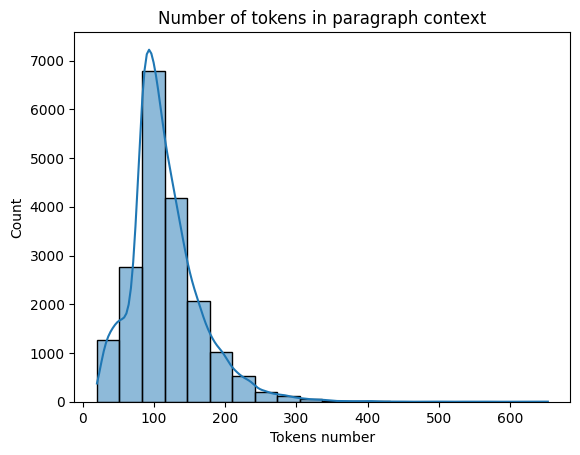

In [62]:
# The number of tokens distribution
ax = sns.histplot(data=paragraphs_trainset_df, x="normalized_tokens_number", bins=20,kde=True)
ax.set_title('Number of tokens in paragraph context')
ax.set_xlabel('Tokens number')

## Questions/ Answers

In this section lets focus on questions and answers:

1. How many tokens are available for every questions
2. How many tokens are available for every answer?

These statistics are important for traditional approaches where the answer is a sliding window over the text.

In [61]:
q_trainset_df['normalized_question'] = q_trainset_df['question'].map(normalize_text)
q_trainset_df['normalized_tokens'] = q_trainset_df['normalized_question'].map(tokenize_text)
q_trainset_df['normalized_tokens_number'] = q_trainset_df['normalized_tokens'].map(lambda x: len(x))

Text(0.5, 0, 'Tokens number')

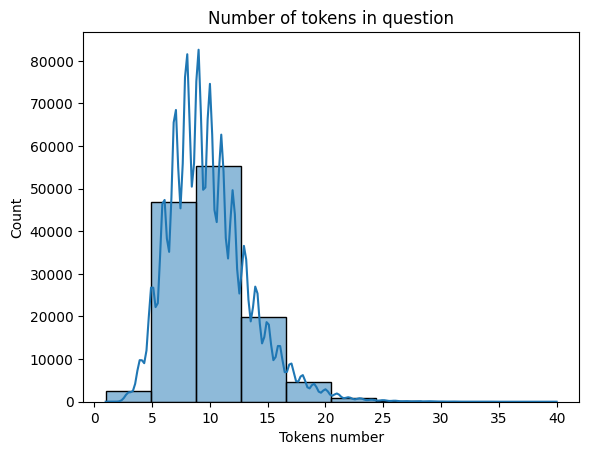

In [64]:
# The number of tokens distribution in question
ax = sns.histplot(data=q_trainset_df, x="normalized_tokens_number", bins=10,kde=True)
ax.set_title('Number of tokens in question')
ax.set_xlabel('Tokens number')

In [82]:
# Give me random questions with length smaller than 5 tokens
q_trainset_df[q_trainset_df['normalized_tokens_number']<5].sample(10)['question']

313             Who started Mitsubishi?
204    What makes predation successful?
100                   Who designed MP3?
348          Who was Feynman's ex-wife?
313          What did Uesugi encourage?
205             When did Esquire start?
435            What does Pakistan mean?
313             Who was Takeda's rival?
58              When was Peterson born?
171             Who did Victoria marry?
Name: question, dtype: object

### Why care about the tokens length?

An initial thought was that questions with minimal length could be marked directly as unanswerable.
Unfortunately, all the samples look quite fine.

### Focus in answers

In [67]:
positive_qa_trainset_df['normalized_answer'] = positive_qa_trainset_df['answer'].map(normalize_text)
positive_qa_trainset_df['normalized_tokens'] = positive_qa_trainset_df['normalized_answer'].map(tokenize_text)
positive_qa_trainset_df['normalized_tokens_number'] = positive_qa_trainset_df['normalized_tokens'].map(lambda x: len(x))

Text(0.5, 0, 'Tokens number')

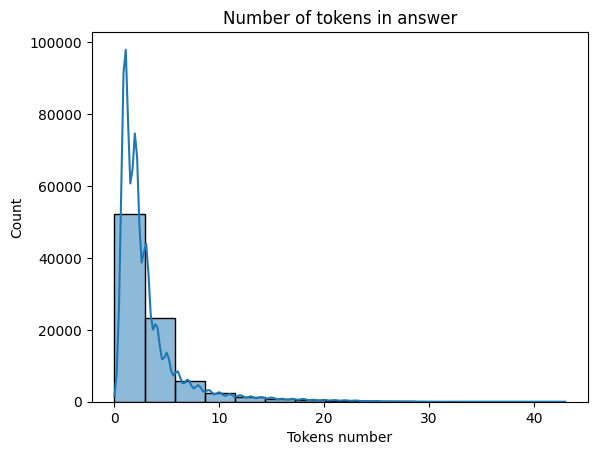

In [69]:
# The number of tokens distribution in all answers
ax = sns.histplot(data=positive_qa_trainset_df, x="normalized_tokens_number", bins=15,kde=True)
ax.set_title('Number of tokens in answer')
ax.set_xlabel('Tokens number')

## Good News!

The answers are quite short. As a result a baseline approach that compares candidate sentence chunks of length N with a question will probably avoid large answers that would minimize F1.